In [8]:
from keras import models
from keras import layers
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


#### 要凍結基底，不然訓練的時候銓重會被更新掉

In [9]:
len(model.trainable_weights)

30

In [10]:
conv_base.trainable = False
len(model.trainable_weights)

4

In [14]:
import os
import numpy as np
base_dir = r"/home/iebi/WorkDir/Shao/data/cats_and_dogs_small"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary")

model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=2e-5), metrics=["accuracy"])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 17s 174ms/step - loss: 0.6032 - accuracy: 0.6810 - val_loss: 0.4173 - val_accuracy: 0.8340
Epoch 2/30
100/100 [==============================] - 11s 110ms/step - loss: 0.4865 - accuracy: 0.7810 - val_loss: 0.3070 - val_accuracy: 0.8530
Epoch 3/30
100/100 [==============================] - 11s 110ms/step - loss: 0.4360 - accuracy: 0.8130 - val_loss: 0.2327 - val_accuracy: 0.8600
Epoch 4/30
100/100 [==============================] - 11s 111ms/step - loss: 0.4018 - accuracy: 0.8245 - val_loss: 0.4196 - val_accuracy: 0.8730
Epoch 5/30
100/100 [==============================] - 11s 110ms/step - loss: 0.3894 - accuracy: 0.8305 - val_loss: 0.2047 - val_accuracy: 0.8830
Epoch 6/30
100/100 [==============================] - 11s 110ms/step - loss: 0.3772 - accuracy: 0.8355 - val_loss: 0.3066 - val_accuracy: 0.8850
Epoch 7/30
100/100 [==========================

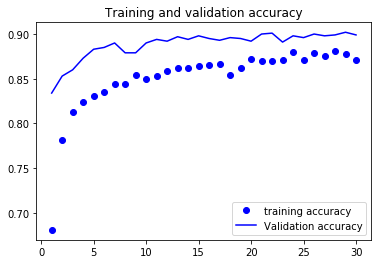

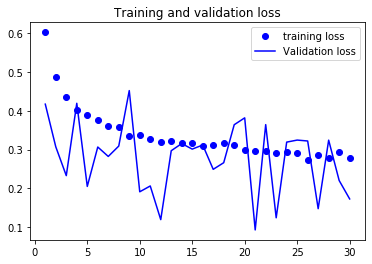

In [17]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()